In [12]:
%reload_ext autoreload

%autoreload 2

In [4]:
#template_file = "../../test_data/unit_tests/protein_normalization/example_proteins.tsv"

template_dda = "../../test_data/system_tests/MaxQuant_boxcar/evidence.txt.maxquant_evidence.aq_reformat.tsv"
template_dia = "../../test_data/system_tests/Spectronaut_SmallFC/20210624_120140_MP-DIA-multi-organis_Report_smallfc_COMPLETE.tsv.zip.spectronaut_fragion_isotopes.aq_reformat.tsv"


samplenumbers_to_check = [10, 100, 1000]

### Learning tests

In [5]:
import directlfq.benchmarking as lfq_benchmark

timed_dda = lfq_benchmark.LFQTimer(template_dda, list_of_samplenumbers_to_check=samplenumbers_to_check, name="DDA")
timed_dia = lfq_benchmark.LFQTimer(template_dia, list_of_samplenumbers_to_check=samplenumbers_to_check, name="DIA")


prot 100 of 7459
prot 200 of 7459
prot 300 of 7459
prot 400 of 7459
prot 500 of 7459
prot 600 of 7459
prot 700 of 7459
prot 800 of 7459
prot 900 of 7459
prot 1000 of 7459
prot 1100 of 7459
prot 1200 of 7459
prot 1300 of 7459
prot 1400 of 7459
prot 1500 of 7459
prot 1600 of 7459
prot 1700 of 7459
prot 1800 of 7459
prot 1900 of 7459
prot 2000 of 7459
prot 2100 of 7459
prot 2200 of 7459
prot 2300 of 7459
prot 2400 of 7459
prot 2500 of 7459
prot 2600 of 7459
prot 2700 of 7459
prot 2800 of 7459
prot 2900 of 7459
prot 3000 of 7459
prot 3100 of 7459
prot 3200 of 7459
prot 3300 of 7459
prot 3400 of 7459
prot 3500 of 7459
prot 3600 of 7459
prot 3700 of 7459
prot 3800 of 7459
prot 3900 of 7459
prot 4000 of 7459
prot 4100 of 7459
prot 4200 of 7459
prot 4300 of 7459
prot 4400 of 7459
prot 4500 of 7459
prot 4600 of 7459
prot 4700 of 7459
prot 4800 of 7459
prot 4900 of 7459
prot 5000 of 7459
prot 5100 of 7459
prot 5200 of 7459
prot 5300 of 7459
prot 5400 of 7459
prot 5500 of 7459
prot 5600 of 7459
p

/Users/constantin/workspace/directlfq/directlfq/normalization.py:301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.ion_dataframe.loc[:,sample] += distance_to_reference
/Users/constantin/workspace/directlfq/directlfq/normalization.py:301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.ion_dataframe.loc[:,sample] += distance_to_reference
/Users/constantin/workspace/directlfq/directlfq/normalization.py:301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

prot 100 of 7459
prot 200 of 7459
prot 300 of 7459
prot 400 of 7459
prot 500 of 7459
prot 600 of 7459
prot 700 of 7459
prot 800 of 7459
prot 900 of 7459
prot 1000 of 7459
prot 1100 of 7459
prot 1200 of 7459
prot 1300 of 7459
prot 1400 of 7459
prot 1500 of 7459
prot 1600 of 7459
prot 1700 of 7459
prot 1800 of 7459
prot 1900 of 7459
prot 2000 of 7459
prot 2100 of 7459
prot 2200 of 7459
prot 2300 of 7459
prot 2400 of 7459
prot 2500 of 7459
prot 2600 of 7459
prot 2700 of 7459
prot 2800 of 7459
prot 2900 of 7459
prot 3000 of 7459
prot 3100 of 7459
prot 3200 of 7459
prot 3300 of 7459
prot 3400 of 7459
prot 3500 of 7459
prot 3600 of 7459
prot 3700 of 7459
prot 3800 of 7459
prot 3900 of 7459
prot 4000 of 7459
prot 4100 of 7459
prot 4200 of 7459
prot 4300 of 7459
prot 4400 of 7459
prot 4500 of 7459
prot 4600 of 7459
prot 4700 of 7459
prot 4800 of 7459
prot 4900 of 7459
prot 5000 of 7459
prot 5100 of 7459
prot 5200 of 7459
prot 5300 of 7459
prot 5400 of 7459
prot 5500 of 7459
prot 5600 of 7459
p

/Users/constantin/workspace/directlfq/directlfq/normalization.py:301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.ion_dataframe.loc[:,sample] += distance_to_reference
/Users/constantin/workspace/directlfq/directlfq/normalization.py:301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.ion_dataframe.loc[:,sample] += distance_to_reference
/Users/constantin/workspace/directlfq/directlfq/normalization.py:301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

prot 100 of 11363
prot 200 of 11363
prot 300 of 11363
prot 400 of 11363
prot 500 of 11363
prot 600 of 11363
prot 700 of 11363
prot 800 of 11363
prot 900 of 11363
prot 1000 of 11363
prot 1100 of 11363
prot 1200 of 11363
prot 1300 of 11363
prot 1400 of 11363
prot 1500 of 11363
prot 1600 of 11363
prot 1700 of 11363
prot 1800 of 11363
prot 1900 of 11363
prot 2000 of 11363
prot 2100 of 11363
prot 2200 of 11363
prot 2300 of 11363
prot 2400 of 11363
prot 2500 of 11363
prot 2600 of 11363
prot 2700 of 11363
prot 2800 of 11363
prot 2900 of 11363
prot 3000 of 11363
prot 3100 of 11363
prot 3200 of 11363
prot 3300 of 11363
prot 3400 of 11363
prot 3500 of 11363
prot 3600 of 11363
prot 3700 of 11363
prot 3800 of 11363
prot 3900 of 11363
prot 4000 of 11363
prot 4100 of 11363
prot 4200 of 11363
prot 4300 of 11363
prot 4400 of 11363
prot 4500 of 11363
prot 4600 of 11363
prot 4700 of 11363
prot 4800 of 11363
prot 4900 of 11363
prot 5000 of 11363
prot 5100 of 11363
prot 5200 of 11363
prot 5300 of 11363
pr

In [15]:
#MaxQuant Runtimes
import pandas as pd


timedrun_6samples = lfq_benchmark.TimedLFQRun(pd.DataFrame(),"maxLFQ")
timedrun_6samples.num_samples =10
timedrun_6samples.runtime_info.overall_runtime = 1

timedrun_1000samples = lfq_benchmark.TimedLFQRun(pd.DataFrame(), "maxLFQ")
timedrun_1000samples.num_samples = 1000
timedrun_1000samples.runtime_info.overall_runtime = 13112+1320

timed_mq_runs = [timedrun_6samples, timedrun_1000samples]

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

class RuntimePlotter():
    def __init__(self, list_of_timed_runs , ax):
        self._ax = ax
        self._list_of_timed_runs = list_of_timed_runs
        self._plot_runtimes()
    
    def _plot_runtimes(self):
        x_values = [x.num_samples for x in self._list_of_timed_runs]
        y_values = [x.runtime_info.overall_runtime for x in self._list_of_timed_runs]
        hue = [x.name for x in self._list_of_timed_runs]
        sns.barplot(x = x_values, y = y_values, hue = hue, ax=self._ax)
        #self._ax.set_yscale("log")
        self._ax.set(xlabel="Number Proteomes", ylabel="Runtime")


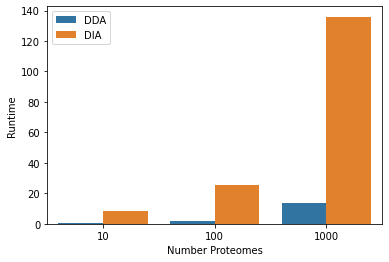

In [21]:
import matplotlib.pyplot as plt

ax = plt.subplot()
all_runs = timed_dda.timed_lfq_runs + timed_dia.timed_lfq_runs #timed_mq_runs

RuntimePlotter(all_runs, ax)